# Projeto 2- Ci√™ncia dos Dados 2021.2

### Integrantes: Fabio Ferreira; Guillermo Kuznietz; Livia Brigido.

# Ideia Inicial: 

#### Ideia de um pa√≠s bem desenvolvido √© normalmente ligada diretamente com o conceito de uma sociedade bem organizada, com grandes desenvolvimentos tecnol√≥gicos e cient√≠ficos, al√©m de possivelmente ser exemplo em √°reas como pol√≠tica, sa√∫de e educa√ß√£o. Mas e o emocional tamb√©m entra nesse quesito? Uma pergunta visivelmente bem abstrata, mas que j√° vem sendo abordada pelo Desenvolvimento Sustent√°vel da ONU desde os anos 70.

#### O Relat√≥rio Mundial da Felicidade teve sua primeira vers√£o lan√ßada em 2012 com a presen√ßa de especialistas multidisciplinares, levando em conta a economia, psicologia, an√°lise de pesquisa, estat√≠sticas nacionais, entre outros. Sobre a pesquisa: "Os dados s√£o coletados de pessoas em mais de 150 pa√≠ses. Cada vari√°vel mensurada revela uma pontu√ß√£o m√©dia ponderada por popula√ß√£o numa escala de 0 a 10, que √© monitorada com o passar do tempo e comparada com a de outros pa√≠ses. Atualmente, essas vari√°veis incluem: PIB per capita real, assist√™ncia social, expectativa de vida saud√°vel, liberdade para fazer escolhas, generosidade e percep√ß√µes de corrup√ß√£o. Cada pa√≠s tamb√©m √© comparado a um pa√≠s hipot√©tico chamado Distopia. Distopia representa as menores m√©dias nacionais para cada vari√°vel chave e, juntamente com erros residuais, √© usado como ponto de refer√™ncia de regress√£o."

#### Dessa Forma, a equipe teve como objetivo analisar essa base de dados, considerando um per√≠odo sem grandes impactos mundiais, como a pandemia que passamos atualmente, e enxergar as rela√ß√µes entre os dados obtidos. Assim, entender quais crit√©rios mant√©m correla√ß√µes mais fortes com o √≠ndice estudado. Os dados escolhidos, portanto, foram os do ano de 2019.

## Defini√ß√£o do problema:

### Predi√ß√£o de qu√£o feliz √© uma popula√ß√£o a partir de √≠ndices como sa√∫de, fam√≠lia, PIB e n√≠vel de corrup√ß√£o :) 

In [1]:
import os
print('Esperamos trabalhar no diret√≥rio')
print(os.getcwd())

Esperamos trabalhar no diret√≥rio
C:\Users\liviabn\Documents\Cdados- Projetos\P2Cdados2021_2\Projeto2_CienciaDados


## Carregando bibliotecas necess√°rias para a an√°lise dos dados:

In [2]:
%matplotlib inline
import pandas as pd
from scipy.stats import norm, probplot

import numpy as np
from scipy import stats
import statsmodels.api as sm

import matplotlib.pyplot as plt

## 1. Manipulando a base de dados:

In [3]:
#Lendo a base de dados
data19= pd.read_csv("2019.csv")
data19

Overall rank         Country or region  Score  GDP per capita  \
0               1                   Finland  7.769           1.340   
1               2                   Denmark  7.600           1.383   
2               3                    Norway  7.554           1.488   
3               4                   Iceland  7.494           1.380   
4               5               Netherlands  7.488           1.396   
..            ...                       ...    ...             ...   
151           152                    Rwanda  3.334           0.359   
152           153                  Tanzania  3.231           0.476   
153           154               Afghanistan  3.203           0.350   
154           155  Central African Republic  3.083           0.026   
155           156               South Sudan  2.853           0.306   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             1.587                    0.986                         0.596   
1             1.573                    0.996                         0.592   
2             1.582                    1.028                         0.603   
3             1.624                    1.026                         0.591   
4             1.522                    0.999                         0.557   
..              ...                      ...                           ...   
151           0.711                    0.614                         0.555   
152           0.885                    0.499                         0.417   
153           0.517                    0.361                         0.000   
154           0.000                    0.105                         0.225   
155           0.575                    0.295                         0.010   

     Generosity  Perceptions of corruption  
0         0.153                      0.393  
1         0.252                      0.410  
2         0.271                      0.341  
3         0.354                      0.118  
4         0.322                      0.298  
..          ...                        ...  
151       0.217                      0.411  
152       0.276                      0.147  
153       0.158                      0.025  
154       0.235                      0.035  
155       0.202                      0.091  

[156 rows x 9 columns]

Legenda: A base de dados acima foi obtida atrav√©s da plataforma Kaggle.com, dispon√≠vel no link: https://www.kaggle.com/mathurinache/world-happiness-report-20152021

### Sobre a base de dados:
A base de dados √© o local em que todas as informa√ß√µes utilizadas nas nossas an√°lises ficam armazenadas. 

##### As colunas presentes cont√©m as seguintes informa√ß√µes, respectivamente:

#### GDP per capita:
O GDP per capita √© o PIB da na√ß√£o dividido pelo n√∫mero de habitantes. Ele √© medido em d√≥lares e n√£o possui nenhuma escala espec√≠fica de marca√ß√£o.

#### Social support:
A assist√™ncia social inclui pol√≠ticas e redes de apoio social, que tem como objetivo objetivo garantir a prote√ß√£o social aos cidad√£os, ou seja, apoio a indiv√≠duos, fam√≠lias e √† comunidade no enfrentamento de suas dificuldades, por meio de servi√ßos, benef√≠cios, programas e projetos. A escala de medi√ß√£o vai de 0 a 1.6, sendo 0 o pior √≠ndice e 1.6 o melhor √≠ndice.


#### Healthy life expectancy:
Expectativa de vida, tamb√©m chamada de esperan√ßa de vida, √© o n√∫mero m√©dio de anos que a popula√ß√£o de um pa√≠s pode esperar viver, caso sejam mantidas as mesmas condi√ß√µes de vida vivenciadas no momento do nascimento. A expectativa de vida est√° bastante relacionada com a qualidade de vida que um pa√≠s possui. Seu valor m√°ximo encontrado foi de 1.141, sendo que, quanto maior, maior a expectativa.

#### Freedom to make life choices:
Liberdade de express√£o, medida em uma escala de 0 a 1. Quanto maior, maior a liberdade.


#### Generosity:
O √≠ndice de generosidade avalia o grau de envolvimento da popula√ß√£o em a√ß√µes de caridade, medida em uma escala de 0 a 1.

#### Perceptions of corruption:
O √≠ndice de percep√ß√£o da corrup√ß√£o nos fornece um panorama sobre o qu√£o corrupto um pa√≠s √©, sendo o principal indicador de corrup√ß√£o mundial. √â medido numa escala de 0 a 0.5, e quanto maior for, maior a percep√ß√£o da popula√ß√£o de que o governo local √© corrupto.


## Limpeza e An√°lise explorat√≥ria

Com os dados em m√£os, podemos manuse√°-los a fim de evitarmos qualquer imprevisto futuro relacionada √† pr√≥pria base, como, por exemplo, linhas em branco. Abaixo, foram realizadas duas etapas para isso: Encontr√°-las e, se necess√°rio, retir√°-las.

In [4]:
#Confirmando que nossa base de dados n√£o tem nenhuma linha (pa√≠s/regi√£o) com dados faltando
data19.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [5]:
#Caso tivesse realmente alguma, era poss√≠vel utilizar a fun√ß√£o abaixo:
data19 = data19.dropna()

## T√©cnica escolhida: REGRESS√ÉO

#### Durante as aulas, tivemos contato com duas formas: Regress√£o e Classifica√ß√£o.  Em poucas palavras, a classifica√ß√£o normalmente √© utilizada para contextos onde h√° a possibilidade de utilizar r√≥tulos discretos como: Gr√°vida, n√£o gravida; Triste, feliz, indiferente; Relevante, irrelevante, muito relevante, muito irrelevante... 

#### Diferente da anterior, a regress√£o volta-se principalmente para dados num√©ricos, dados de entrada para valores que est√£o inseridos em reais e cont√≠nuos. Se em uma classifica√ß√£o o objetivo era descobrir se uma pessoa est√° gr√°vida ou n√£o, a regress√£o poderia seguir o caminho de descobrir a probabilidade disso acontecer. Como s√£o caracteristicas presentes na base de dados escolhida, ser√° o modelo abordado daqui em diante.

Abaixo o objetivo foi preparar a base de dados para que n√£o ocorresse nenhum problema com os modelos de regress√£o que ser√£o utilizados posteriormente. A conclus√£o encontrada foi retirar duas colunas em espec√≠fico: Overall Rank-- Intimamente ligada ao score de felicidade, o que n√£o deixa motivos para analisar a rela√ß√£o entre a target e esse dado; Country or region-- Uma coluna n√£o num√©rica. OBSERVA√á√ÉO: √â importante salientar que h√° a possibilidade de manuse√°-la a fim de que seja poss√≠vel "torn√°-la num√©rica" e assim utiliz√°-la tamb√©m como feature (Exemplo: Ver a rela√ß√£o entre a regi√£o que o pa√≠s se encontra e o n√≠vel de felicidade). Por quest√µes de simplifica√ß√£o, n√£o foi requerida.

In [6]:
# Como o overall rank √© uma outra forma de representar o score, s√≥ que baseando-se em posi√ß√µes:
data19_H=data19.drop(columns=["Overall rank"])

#Como nossa an√°lise n√∫merica
data19_H= data19_H.drop(columns=["Country or region"])

Para termos uma no√ß√£o de como esses dados num√©ricos est√£o distribuidos, realizaremos uma an√°lise num√©rica. 

In [7]:
data19_H.describe()

Score  GDP per capita  Social support  Healthy life expectancy  \
count  156.000000      156.000000      156.000000               156.000000   
mean     5.407096        0.905147        1.208814                 0.725244   
std      1.113120        0.398389        0.299191                 0.242124   
min      2.853000        0.000000        0.000000                 0.000000   
25%      4.544500        0.602750        1.055750                 0.547750   
50%      5.379500        0.960000        1.271500                 0.789000   
75%      6.184500        1.232500        1.452500                 0.881750   
max      7.769000        1.684000        1.624000                 1.141000   

       Freedom to make life choices  Generosity  Perceptions of corruption  
count                    156.000000  156.000000                 156.000000  
mean                       0.392571    0.184846                   0.110603  
std                        0.143289    0.095254                   0.094538  
min                        0.000000    0.000000                   0.000000  
25%                        0.308000    0.108750                   0.047000  
50%                        0.417000    0.177500                   0.085500  
75%                        0.507250    0.248250                   0.141250  
max                        0.631000    0.566000                   0.453000

Legenda: An√°lise num√©rica, levando em conta: Contagem total, m√©dia, desvio padr√£o, valor m√≠nimo, alguns percentis e valor m√°ximo.

In [8]:
#Renomeando para facilitar a leitura:

data19_H= data19_H.rename(columns={"Score":"Happiness Score"})
data19_H

Happiness Score  GDP per capita  Social support  Healthy life expectancy  \
0              7.769           1.340           1.587                    0.986   
1              7.600           1.383           1.573                    0.996   
2              7.554           1.488           1.582                    1.028   
3              7.494           1.380           1.624                    1.026   
4              7.488           1.396           1.522                    0.999   
..               ...             ...             ...                      ...   
151            3.334           0.359           0.711                    0.614   
152            3.231           0.476           0.885                    0.499   
153            3.203           0.350           0.517                    0.361   
154            3.083           0.026           0.000                    0.105   
155            2.853           0.306           0.575                    0.295   

     Freedom to make life choices  Generosity  Perceptions of corruption  
0                           0.596       0.153                      0.393  
1                           0.592       0.252                      0.410  
2                           0.603       0.271                      0.341  
3                           0.591       0.354                      0.118  
4                           0.557       0.322                      0.298  
..                            ...         ...                        ...  
151                         0.555       0.217                      0.411  
152                         0.417       0.276                      0.147  
153                         0.000       0.158                      0.025  
154                         0.225       0.235                      0.035  
155                         0.010       0.202                      0.091  

[156 rows x 7 columns]

### Primeira an√°lise: Features, Targets e rela√ß√µes entre ambos

#### Target-- Happiness Score
Defini√ß√£o:Taxa de felicidade da popula√ß√£o de determinado pa√≠s

#### Features-- GDP per capita,	Social support,	Healthy life expectancy,	Freedom to make life choices,	Generosity	Perceptions of corruption.
Defini√ß√£o:Fatores secund√°rios que afetam no nosso target (Hapiness Score)

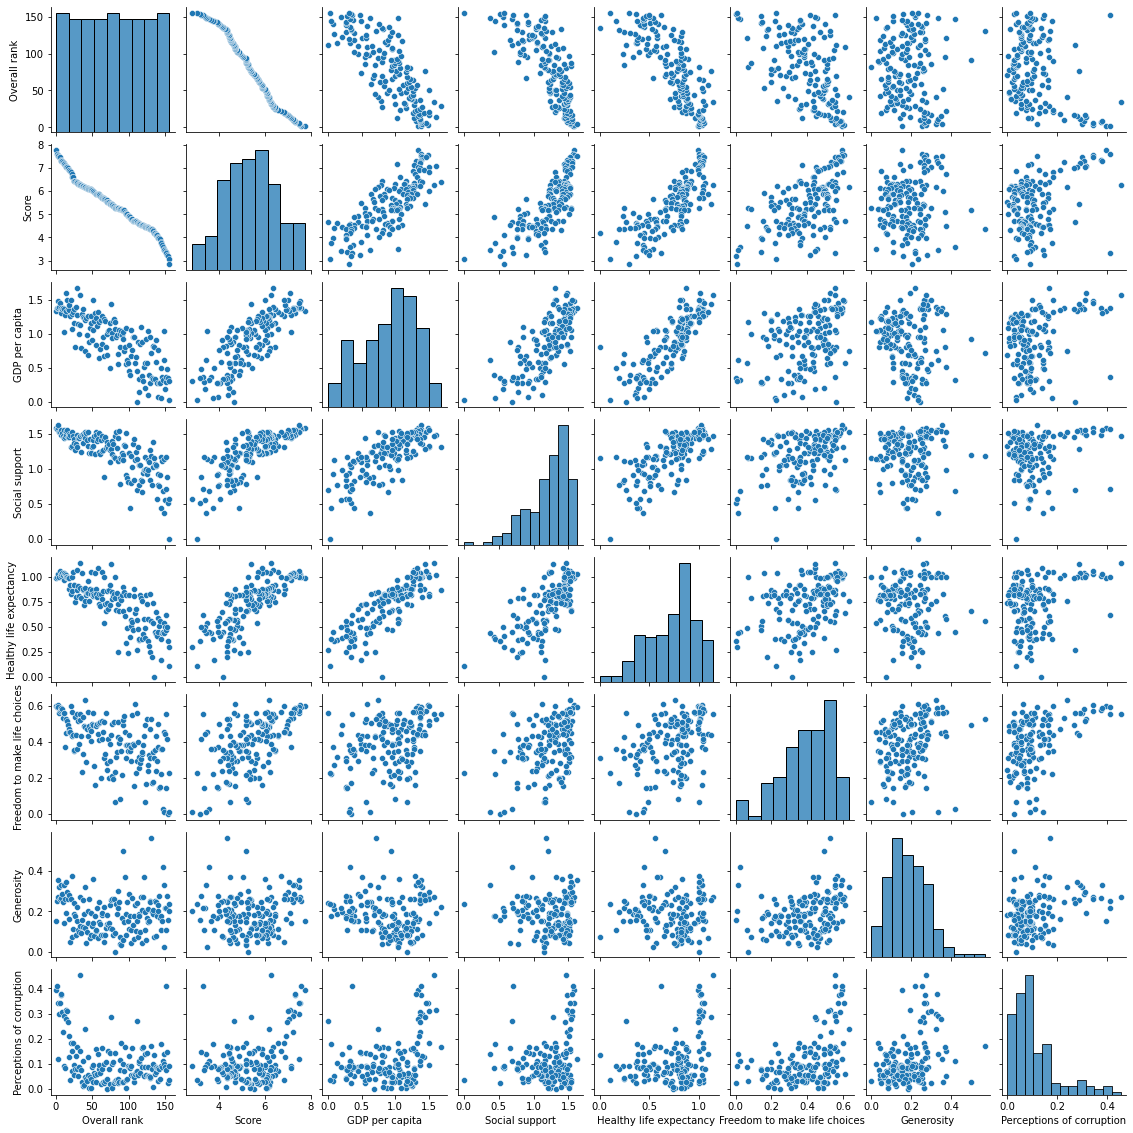

In [9]:
import seaborn as sns
sns.pairplot(data19, height=2);

In [10]:
#O que s√£o nossas features e o nosso target:
X = data19_H[['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption']]
y = data19_H['Happiness Score']


In [11]:
def regress(y,X):
    
    X_cp = sm.add_constant(X)
    model = sm.OLS(y,X_cp)
    results = model.fit()
    
    return results

results = regress(y,X)
results.summary()

#Desde j√°, conseguimos analisar se as features se comportam como imaginado pela hip√≥tese inicial: N√£o influenciam na felicidade
#OBS: Levando em conta um alpha padr√£o de 10%, j√° √© poss√≠vel analisar quem ser√° descartado.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness Score   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     87.62
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           2.40e-46
Time:                        20:20:55   Log-Likelihood:                -119.76
No. Observations:                 156   AIC:                             253.5
Df Residuals:                     149   BIC:                             274.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.7952      0.211      8.505      0.000       1.378       2.212
GDP per capita                   0.7754      0.218      3.553      0.001       0.344       1.207
Social support                   1.1242      0.237      4.745      0.000       0.656       1.592
Healthy life expectancy          1.0781      0.335      3.223      0.002       0.417       1.739
Freedom to make life choices     1.4548      0.375      3.876      0.000       0.713       2.197
Generosity                       0.4898      0.498      0.984      0.327      -0.494       1.473
Perceptions of corruption        0.9723      0.542      1.793      0.075      -0.099       2.044
==============================================================================
Omnibus:                        8.188   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                7.971
Skew:                          -0.498   Prob(JB):                       0.0186
Kurtosis:                       3.483   Cond. No.                         28.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A partir da observa√ß√£o da tabela acima, iremos continuar o processo de limpeza/manuseo analisando o P> t. 

Imaginemos que temos como hip√≥tese inicial um contexto onde nenhuma das features tem rela√ß√£o com nossa target (Ou irrelevante rela√ß√£o). Para isso, precisamos definir um n√≠vel de signific√¢ncia ùõº . Por padr√£o, esse valor escolhido foi o de 10%. Podemos definir que, caso apresentar valor-p menor do que o  ùõº  adotado, nossa hip√≥tese ser√° descartada, ou seja, a rela√ß√£o que procur√°vamos foi descartada.

Conclus√£o: Uma das colunas ser√° retirada

In [12]:
# Backward Stepwise-- Ap√≥s retirar Generosity
X = data19_H[['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption']]
Y = data19_H['Happiness Score']

results = regress(Y,X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness Score   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     105.0
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           3.59e-47
Time:                        20:20:55   Log-Likelihood:                -120.27
No. Observations:                 156   AIC:                             252.5
Df Residuals:                     150   BIC:                             270.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.8689      0.197      9.471      0.000       1.479       2.259
GDP per capita                   0.7455      0.216      3.450      0.001       0.319       1.172
Social support                   1.1180      0.237      4.722      0.000       0.650       1.586
Healthy life expectancy          1.0840      0.334      3.241      0.001       0.423       1.745
Freedom to make life choices     1.5340      0.367      4.185      0.000       0.810       2.258
Perceptions of corruption        1.1176      0.522      2.142      0.034       0.086       2.149
==============================================================================
Omnibus:                        9.283   Durbin-Watson:                   1.668
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                9.278
Skew:                          -0.527   Prob(JB):                      0.00967
Kurtosis:                       3.562   Cond. No.                         26.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

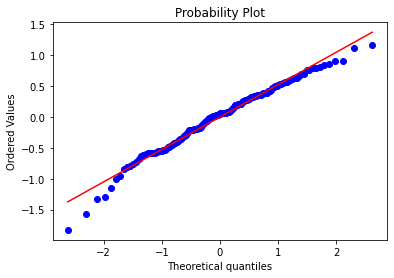

In [13]:
#Saindo do "previsto"-- residuos: Varia√ß√£o m√©dia dos meus resultados
probplot(results.resid, dist="norm", plot= plt);

Text(0, 0.5, 'Percentis dos res√≠duos')

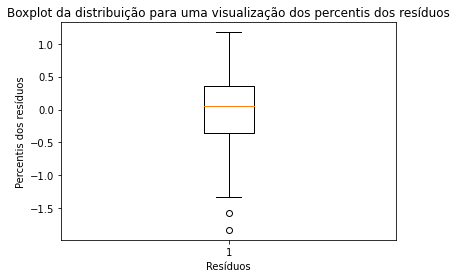

In [14]:
#outliers
plt.boxplot(results.resid); #Probabilidade Vs Quartis te√≥ricos
plt.title('Boxplot da distribui√ß√£o para uma visualiza√ß√£o dos percentis dos res√≠duos')
plt.xlabel('Res√≠duos')
plt.ylabel('Percentis dos res√≠duos')

In [15]:
#Paises abaixo da media 
print(np.where(results.resid<-1.5))

(array([147, 151], dtype=int64),)


In [16]:
data19.loc[147,:]

Overall rank                         148
Country or region               Botswana
Score                              3.488
GDP per capita                     1.041
Social support                     1.145
Healthy life expectancy            0.538
Freedom to make life choices       0.455
Generosity                         0.025
Perceptions of corruption            0.1
Name: 147, dtype: object

In [17]:
data19.loc[151,:]

Overall rank                       152
Country or region               Rwanda
Score                            3.334
GDP per capita                   0.359
Social support                   0.711
Healthy life expectancy          0.614
Freedom to make life choices     0.555
Generosity                       0.217
Perceptions of corruption        0.411
Name: 151, dtype: object

### Retirar, ou n√£o retir√°-los: 
Importante salientar que, por mais que seja um outlier, n√£o √© correto retir√°-los sem justificativas concretas. O risco que corremos, dessa forma, √© enviesar o estudo e, consequentemente, obter resultados que n√£o refletem a realidade. Os mesmos que podem parecer "pontos fora da tangente", podem muito bem refletirem "desvios" que est√£o conforme o real.

Sobre os dois pa√≠ses acima, h√° o fato de apresentarem alguns problemas com governos n√£o totalmente transparentes e, relacionando com os aspectos que est√£o sendo estudados, reconhece a grande possibilidade disso influenciar na caracter√≠stica de outlier.

### Adicional- Caso quis√©ssemos analisar de outra maneira...

O que utilizamos acima foram os res√≠duos, coisa que j√° conseguimos atrav√©s da fun√ß√£o. Por√©m esse processo poderia tamb√©m ser realizado, de uma forma um pouco mais complexa, analisando cada feature por vez. O m√©todo abaixo n√£o foi utilizado, mas poderia ser facilmente empregado. Note que um dos pa√≠ses que retiramos acima aparece tamb√©m nesse caso.

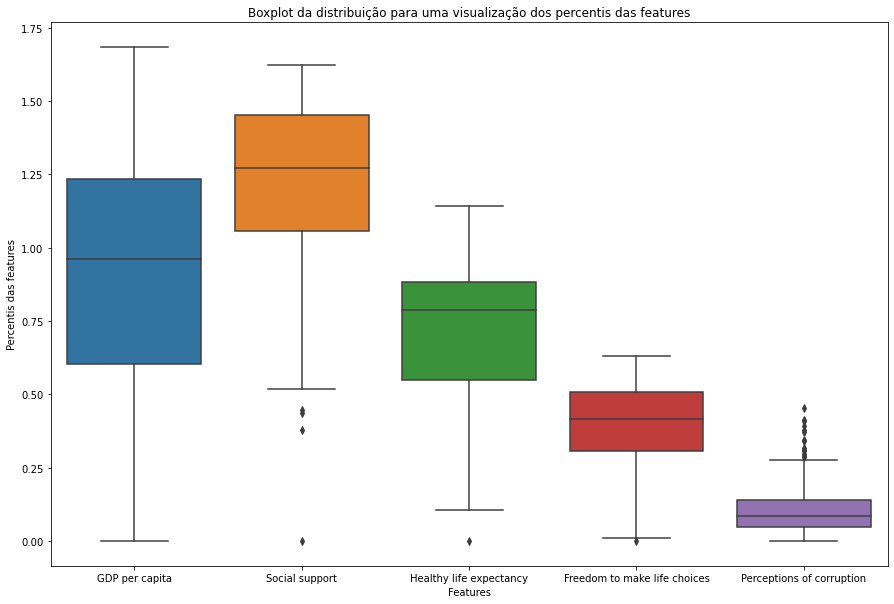

In [18]:
#Gr√°fico dos outliers separados por cada feature
features=['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption']
plt.figure(figsize=(15, 10))
sns.boxplot(data=data19[features])
plt.title('Boxplot da distribui√ß√£o para uma visualiza√ß√£o dos percentis das features')
plt.xlabel('Features')
plt.ylabel('Percentis das features')
plt.show()

In [19]:
#Pa√≠ses com suporte social abaixo da m√©dia 
print(np.where(data19_H["Social support"]<0.5))

(array([101, 144, 148, 154], dtype=int64),)


In [20]:
data19.loc[[101,144,148,154],:]

Overall rank         Country or region  Score  GDP per capita  \
101           102                     Benin  4.883           0.393   
144           145                   Burundi  3.775           0.046   
148           149                     Syria  3.462           0.619   
154           155  Central African Republic  3.083           0.026   

     Social support  Healthy life expectancy  Freedom to make life choices  \
101           0.437                    0.397                         0.349   
144           0.447                    0.380                         0.220   
148           0.378                    0.440                         0.013   
154           0.000                    0.105                         0.225   

     Generosity  Perceptions of corruption  
101       0.175                      0.082  
144       0.176                      0.180  
148       0.331                      0.141  
154       0.235                      0.035

In [21]:
#Pa√≠ses com expectativa de vida abaixo da m√©dia 
print(np.where(data19_H["Healthy life expectancy"]<0.1))

(array([134], dtype=int64),)


In [22]:
data19.loc[[134],:]

Overall rank Country or region  Score  GDP per capita  Social support  \
134           135         Swaziland  4.212           0.811           1.149   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
134                      0.0                         0.313       0.074   

     Perceptions of corruption  
134                      0.135

In [23]:
#Pa√≠ses com percep√ß√£o de corrup√ß√£o acima da m√©dia 
print(np.where(data19_H["Perceptions of corruption"]>0.35))

(array([  0,   1,   6,   7,  33, 151], dtype=int64),)


In [24]:
data19.loc[[0, 1, 6, 7, 33, 151],:]

Overall rank Country or region  Score  GDP per capita  Social support  \
0               1           Finland  7.769           1.340           1.587   
1               2           Denmark  7.600           1.383           1.573   
6               7            Sweden  7.343           1.387           1.487   
7               8       New Zealand  7.307           1.303           1.557   
33             34         Singapore  6.262           1.572           1.463   
151           152            Rwanda  3.334           0.359           0.711   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
0                      0.986                         0.596       0.153   
1                      0.996                         0.592       0.252   
6                      1.009                         0.574       0.267   
7                      1.026                         0.585       0.330   
33                     1.141                         0.556       0.271   
151                    0.614                         0.555       0.217   

     Perceptions of corruption  
0                        0.393  
1                        0.410  
6                        0.373  
7                        0.380  
33                       0.453  
151                      0.411

## Modelos preditivos

##### Ap√≥s o preparo dos dados, h√° a necessidade de utilizar diferentes formas para manuse√°-los. Vale lembrar que anteriormente j√° est√°vamos utilizando a regress√£o linear. Al√©m da necessidade de analisar quais se mostram mais edequados para a predi√ß√£o, h√° tamb√©m a possibilidade de discutir sobre como alguns dos v√°rios modelos existentes funcionam.

### Como iremos compar√°-los? 
O desempenho de cada um pode ser visualizado de diferentes formas. Uma delas √© analisando algumas caracteristicas dos resultados da pr√≥pria aplica√ß√£o, sendo algumas delas:

#### Coeficiente de determina√ß√£o (R2):
O coeficiente de determina√ß√£o √© uma medida de ajuste de um modelo estat√≠stico linear generalizado, como a regress√£o linear simples ou m√∫ltipla, aos valores observados de uma vari√°vel aleat√≥ria. Ela varia entre 0 e 1, podendo ser expresso tambem em termos percentuais.

#### Erro m√©dio absoluto (mae):
O Erro Absoluto M√©dio consiste na m√©dia das dist√¢ncias entre valores preditos e reais. Diferentemente do MSE e do RMSE, essa m√©trica n√£o inflige t√£o severamente os outliers do modelo.

#### Erro quadr√°tico m√©dio (mse):
O erro quadr√°tico m√©dio √© uma medida de como o retorno de um fundo se afasta do retorno da refer√™ncia. Quanto maior o erro quadr√°tico m√©dio, maior o afastamento entre o retorno do fundo e o retorno da refer√™ncia e virce-versa.

#### Erro quadr√°tico m√©dio ao quadrado (rmse):
O RMSE mede a diferen√ßa entre os valores previstos pelo modelo e os valores observados. Pode ser considerado como o "desvio padr√£o dos erros".


### 1. Regress√£o Linear
Regress√£o linear √© uma t√©cnica estat√≠stica usada para analisar a rela√ß√£o entre uma √∫nica
vari√°vel a ser explicada e um conjunto de outras vari√°veis explicativas.
A vari√°vel explicada tamb√©m recebe o nome de vari√°vel dependente, e as vari√°veis
explicativas tamb√©m s√£o chamadas de vari√°veis independentes.

A regress√£o linear simples usa vari√°veis independentes (x) para explicar ou
prever o resultado da vari√°vel dependente (Y). Os parametros medem o quanto que uma varia√ß√£o em uma vari√°vel X afetam a vari√°vel
explicada Y.

In [25]:
from sklearn.model_selection import train_test_split
X = data19_H[['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption']]
Y = data19_H['Happiness Score']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state= 100)

In [26]:
def regress(y,X):
    
    X_cp = sm.add_constant(X)
    model = sm.OLS(y,X_cp)
    results = model.fit()
    
    return results

results = regress(y_train,X_train)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness Score   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     86.07
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           1.06e-37
Time:                        20:20:57   Log-Likelihood:                -93.336
No. Observations:                 124   AIC:                             198.7
Df Residuals:                     118   BIC:                             215.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.8460      0.218      8.462      0.000       1.414       2.278
GDP per capita                   0.5824      0.247      2.353      0.020       0.092       1.073
Social support                   1.2122      0.261      4.646      0.000       0.695       1.729
Healthy life expectancy          1.2471      0.361      3.453      0.001       0.532       1.962
Freedom to make life choices     1.1673      0.402      2.903      0.004       0.371       1.964
Perceptions of corruption        1.7316      0.597      2.899      0.004       0.549       2.914
==============================================================================
Omnibus:                        6.908   Durbin-Watson:                   1.802
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                6.451
Skew:                          -0.516   Prob(JB):                       0.0397
Kurtosis:                       3.430   Cond. No.                         27.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
from sklearn.linear_model import LinearRegression
regressorLinear= LinearRegression()
regressorLinear.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = regressorLinear.predict(X_test)

In [29]:
df_Linear = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df_Linear.head()

Real Values  Predicted Values
45         6.100          5.379697
11         7.167          6.208431
122        4.466          4.462086
15         7.021          6.986657
127        4.390          4.265631

In [30]:
from sklearn.metrics import r2_score
Rsqrt_Linear = r2_score(y_test, y_pred)
Rsqrt_Linear

0.7337850220148568

In [31]:
from sklearn.metrics import mean_squared_error
mseL= mean_squared_error(y_test, y_pred)
rmseL= mean_squared_error(y_test, y_pred, squared= False)
print(mseL)
print(rmseL)

0.33160261950550224
0.5758494764306921


In [32]:
from sklearn.metrics import mean_absolute_error
maeL= mean_absolute_error(y_test, y_pred)
maeL

0.4259958639196081

### 2. Decision Tree Regression

### Entendendo o processo

A abordagem com a Decis√£o em √°rvore pode abranger tanto regress√£o como classifica√ß√£o, e pode ser dividida em tr√™s partes:
N√≥ raiz, daquele que sai os restantes dos n√≥s e onde se encontram todos os dados, ainda sem nenhuma divis√£o. N√≥s interiores, onde come√ßam as divis√µes, baseadas nas regras de decis√µes feitas pelo modelo. Por fim, os "n√≥s folhas", os outcomes de fato, ou seja, os resultados obtidos.

<img src="fruit-decision-tree.png" style="height:200px">

Legenda: Exemplo de uma decis√£o em √°rvore para decidir a classifica√ß√£o de uma fruta.

Para entender de forma clara como programar esse m√©todo, foi feito um teste com apenas uma feature-- GDP per capita. O objetivo √© analisar que, diferente do exemplo acima, que muda de "categoria"-- Ex: De amarelo, pode ir para laranja, nossa tentativa abaixo ter√° como crit√©rio uma faixa dos dados. Fazendo uma analogia ao exemplo, poderia ser levado em conta a quantidade de pigmento amarelo em uma fruta (Se pouco, voltar-se para uma fruta vermelha, se muito, frutas verdes ou laranjas).

In [33]:
#Decision Tree Regression:
y = data19_H['Happiness Score'].values
X = data19_H['GDP per capita'].values

#Base de treinamento e teste-- Ver como o modelo ir√° se sair
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 100)

from sklearn.tree import DecisionTreeRegressor

regressorTeste = DecisionTreeRegressor()

#Treinando o modelo para analisar posteriormente
regressorTeste.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))
y_pred_Teste= regressorTeste.predict(X_test.reshape(-1,1))


In [34]:
#Uma das formas de analisar √© plotando uma tabela com os valores reais Vs Valores preditados:
df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred_Teste.reshape(-1)})
df.head()

Real Values  Predicted Values
0        6.100             4.639
1        7.167             5.191
2        4.466             3.410
3        7.021             6.021
4        4.390             4.534

Assim como utilizamos na regress√£o linear, poderiamos ter aplicado as vari√°veis como r2, mae e mse. Como essa etapa foi apenas para exemplificar, a forma escolhida foi visual, com um gr√°fico.

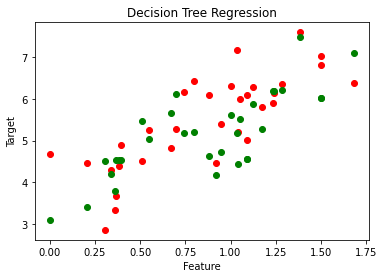

In [35]:
# Visualising the Decision Tree Regression Results 
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red', label= "Teste")
plt.scatter(X_test, y_pred_Teste, color = 'green', label="Predi√ß√£o")
plt.title('Decision Tree Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

## Aplicando de fato:

Ap√≥s analisar como funciona, aplicaremos para todas as nossas features:

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

X = data19_H[['GDP per capita', 'Social support', 'Healthy life expectancy','Freedom to make life choices', 'Perceptions of corruption']]
y = data19_H['Happiness Score']

X_train_Tree, X_test_Tree, y_train_Tree, y_test_Tree = train_test_split(X, y, test_size = 0.2, random_state= 100)

Colunas= ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption']
regr = DecisionTreeRegressor(max_depth=3, random_state=100) #max_depth- Quantas ramifica√ß√µes

regr.fit(X_train_Tree, y_train_Tree) #Dataframe ele j√° entende como uma matriz

DecisionTreeRegressor(max_depth=3, random_state=100)

In [37]:
text_representation = tree.export_text(regr)
print(text_representation)

|--- feature_0 <= 1.11
|   |--- feature_2 <= 0.65
|   |   |--- feature_1 <= 0.76
|   |   |   |--- value: [3.57]
|   |   |--- feature_1 >  0.76
|   |   |   |--- value: [4.41]
|   |--- feature_2 >  0.65
|   |   |--- feature_1 <= 1.08
|   |   |   |--- value: [4.67]
|   |   |--- feature_1 >  1.08
|   |   |   |--- value: [5.43]
|--- feature_0 >  1.11
|   |--- feature_1 <= 1.45
|   |   |--- feature_3 <= 0.34
|   |   |   |--- value: [5.57]
|   |   |--- feature_3 >  0.34
|   |   |   |--- value: [6.00]
|   |--- feature_1 >  1.45
|   |   |--- feature_4 <= 0.07
|   |   |   |--- value: [6.25]
|   |   |--- feature_4 >  0.07
|   |   |   |--- value: [7.15]



Assim como exemplificado anteriormente, abaixo temos a visualiza√ß√£o "em √°rvore", mas agora com a t√©cnica que escolhemos: A regress√£o

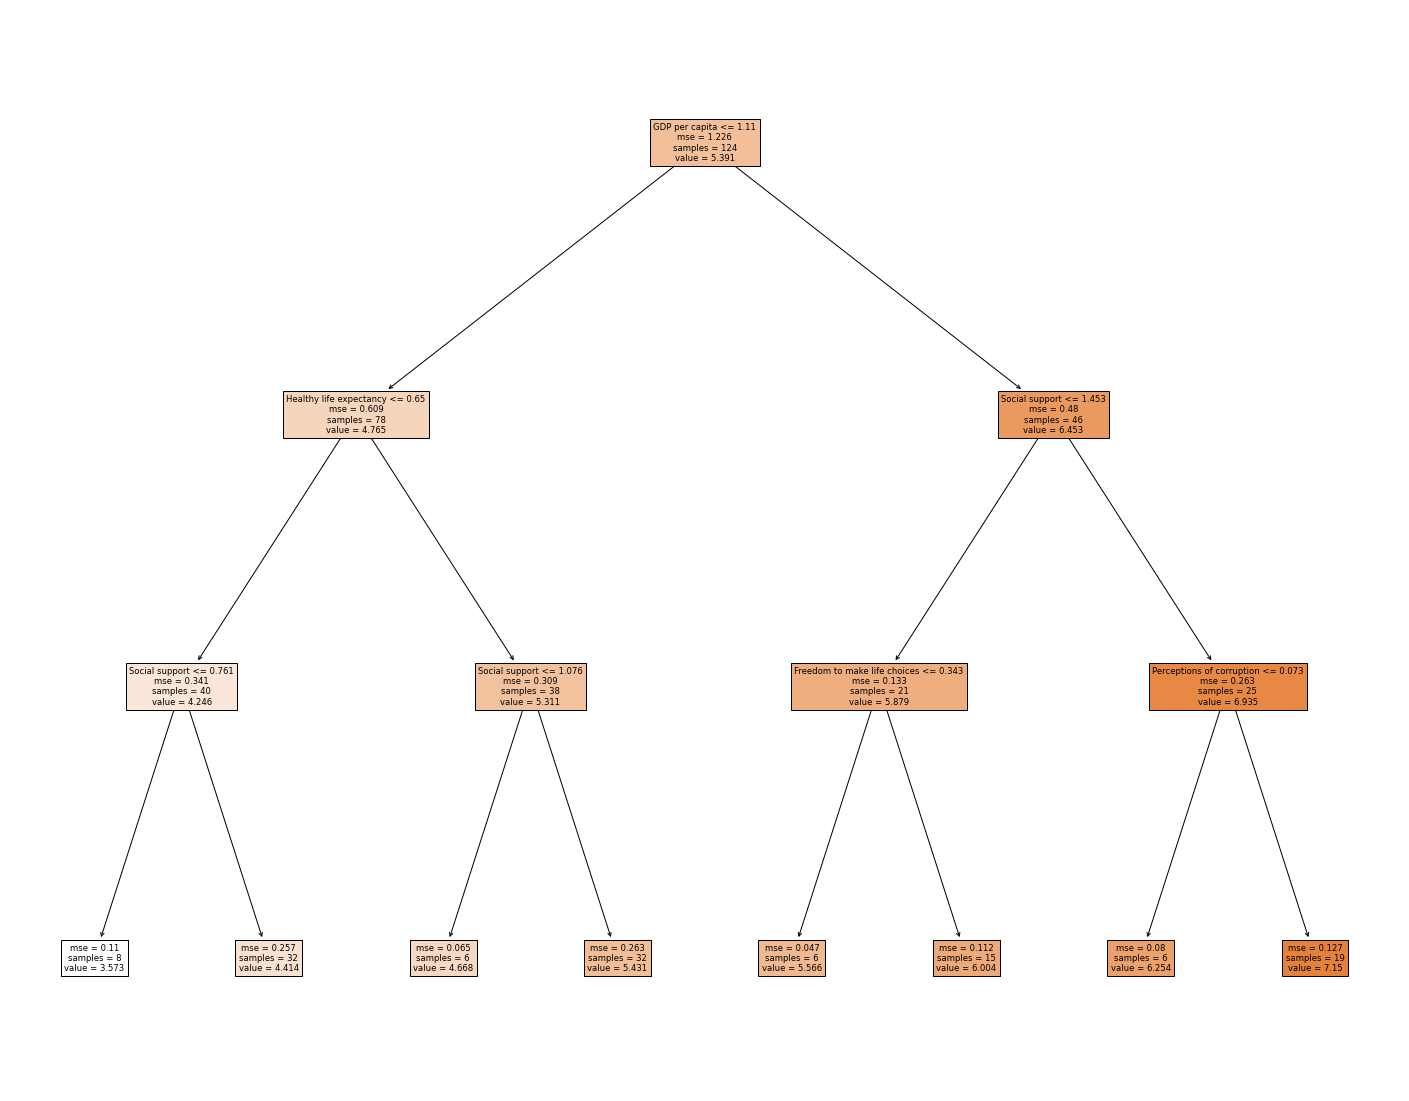

In [38]:
plt.figure(figsize=(25,20))
arvore= tree.plot_tree(regr, feature_names=Colunas, filled=True)
plt.savefig('happyTree.png')

In [39]:
#Utilizando as ramifica√ß√µes que realmente far√£o sentido para o modelo (N√∫mero de features)
regr = DecisionTreeRegressor(max_depth=5, random_state=100) #max_depth- Quantas ramifica√ß√µes
regr.fit(X_train_Tree, y_train_Tree) #Dataframe ele j√° entende como uma matriz

DecisionTreeRegressor(max_depth=5, random_state=100)

In [40]:
y_pred_Tree = regr.predict(X_test_Tree)

In [41]:
df_Tree = pd.DataFrame({'Real Values':y_test_Tree, 'Predicted Values':y_pred_Tree})
df_Tree.head()

Real Values  Predicted Values
45         6.100          5.501071
11         7.167          5.501071
122        4.466          4.297083
15         7.021          7.077100
127        4.390          4.297083

In [42]:
from sklearn.metrics import r2_score
Rsqrt_Tree = r2_score(y_test, y_pred_Tree)
Rsqrt_Tree

0.601128996933253

In [43]:
from sklearn.metrics import mean_squared_error
mseT= mean_squared_error(y_test, y_pred_Tree)
rmseT= mean_squared_error(y_test, y_pred_Tree, squared= False)
print(mseT)
print(rmseT)

0.49684157691947006
0.7048699007047117


In [44]:
from sklearn.metrics import mean_absolute_error
maeT= mean_absolute_error(y_test, y_pred_Tree)
maeT

0.5470585164835164

### 3. Random Forest Regression
Random Forest √© um m√©todo de aprendizado de m√°quina utilizado para problemas que envolvam classifica√ß√£o ou regress√£o. Ele se baseia em uma cole√ß√£o de √°rvores de decis√£o em que os s√£o vetores aleat√≥rios independentes e identicamente distribu√≠dos. Podemos pensar em uma √°rvore de decis√£o como uma representa√ß√£o gr√°fica para um determinado processo de decis√£o. As √°rvores s√£o formadas por n√≥s, que armazenam informa√ß√£o (perguntas). O n√≥ raiz √© o n√≥ que possui maior n√≠vel hier√°rquico e, a partir dele, ramificam-se os n√≥s filhos. O objetivo principal de Random Forest √© minimizar o erro de generaliza√ß√£o com a menor perda de dados.

In [45]:
from sklearn.ensemble import RandomForestRegressor
X_train_Forest, X_test_Forest, y_train_Forest, y_test_Forest = train_test_split(X, y, test_size = 0.2, random_state= 100)

In [46]:
regressorF = RandomForestRegressor(n_estimators = 10, random_state = 100)
regressorF.fit(X_train_Forest, y_train_Forest);

In [47]:
y_pred_Forest = regressorF.predict(X_test_Forest)
y_pred_Forest

array([5.3572, 5.8369, 4.1228, 7.2415, 4.4745, 3.8975, 4.1194, 7.4833,
       3.7121, 5.7766, 5.5333, 5.8823, 5.4473, 6.5898, 4.5489, 5.2359,
       6.1024, 5.5382, 5.6951, 4.4722, 6.2003, 6.1981, 4.3587, 4.3529,
       6.131 , 3.8118, 4.1451, 6.0655, 6.0558, 5.122 , 4.6698, 5.6363])

In [48]:
X_test_Forest

GDP per capita  Social support  Healthy life expectancy  \
45            0.882           1.232                    0.758   
11            1.034           1.441                    0.963   
122           0.204           0.986                    0.390   
15            1.499           1.553                    0.999   
127           0.385           1.105                    0.308   
111           0.000           0.698                    0.268   
133           0.336           1.033                    0.532   
1             1.383           1.573                    0.996   
101           0.393           0.437                    0.397   
51            1.050           1.409                    0.828   
31            1.004           1.439                    0.802   
96            1.092           1.513                    0.815   
26            0.800           1.269                    0.746   
29            1.286           1.484                    1.062   
120           0.512           0.983                    0.581   
77            0.945           1.212                    0.845   
41            1.238           1.515                    0.818   
40            0.745           1.529                    0.756   
59            1.173           1.508                    0.729   
102           0.673           0.799                    0.508   
54            1.237           1.528                    0.874   
32            1.124           1.465                    0.891   
84            0.696           1.111                    0.245   
145           0.366           1.114                    0.433   
46            1.092           1.432                    0.881   
155           0.306           0.575                    0.295   
151           0.359           0.711                    0.614   
20            1.503           1.310                    0.825   
28            1.684           1.313                    0.871   
89            1.043           1.147                    0.769   
123           0.921           1.000                    0.815   
85            0.551           1.438                    0.723   

     Freedom to make life choices  Perceptions of corruption  
45                          0.489                      0.006  
11                          0.558                      0.093  
122                         0.494                      0.138  
15                          0.516                      0.310  
127                         0.327                      0.052  
111                         0.559                      0.270  
133                         0.344                      0.100  
1                           0.592                      0.410  
101                         0.349                      0.082  
51                          0.557                      0.028  
31                          0.390                      0.086  
96                          0.311                      0.004  
26                          0.535                      0.078  
29                          0.362                      0.079  
120                         0.431                      0.053  
77                          0.212                      0.006  
41                          0.291                      0.042  
40                          0.631                      0.240  
59                          0.410                      0.096  
102                         0.372                      0.093  
54                          0.495                      0.161  
32                          0.523                      0.150  
84                          0.426                      0.041  
145                         0.361                      0.089  
46                          0.471                      0.050  
155                         0.010                      0.091  
151                         0.555                      0.411  
20                          0.598                      0.182  
28                          0.555                      0.167  
89

In [49]:
df = pd.DataFrame({'Real Values':y_test_Forest, 'Predicted Values':y_pred_Forest})
df.head()

Real Values  Predicted Values
45         6.100            5.3572
11         7.167            5.8369
122        4.466            4.1228
15         7.021            7.2415
127        4.390            4.4745

In [50]:
from sklearn.metrics import r2_score
Rsqrt_Forest = r2_score(y_test, y_pred_Forest)
Rsqrt_Forest

0.7154258297702374

In [51]:
from sklearn.metrics import mean_squared_error
mseF= mean_squared_error(y_test, y_pred_Forest)
rmseF= mean_squared_error(y_test, y_pred_Forest, squared= False)
print(mseF)
print(rmseF)

0.3544711909374999
0.595374832301047


In [52]:
from sklearn.metrics import mean_absolute_error
maeF= mean_absolute_error(y_test, y_pred_Forest)
maeF

0.466465625

## Conclus√£o:
Por fim, ap√≥s finalizar os m√©todos, nosso objetivo final √© analisar o desempenho de cada um deles, levando em conta que essa classifica√ß√£o servir√° exclusivamente para os dados escolhidos: Happiness Score

In [53]:
data_conclusao = {
        "Regress√£o Linear": [Rsqrt_Linear,maeL,mseL,rmseL],
        "Regress√£o Decision Tree":[Rsqrt_Tree,maeT,mseF,rmseF],
        "Regress√£o Random Forest":[Rsqrt_Forest,maeF,mseF,rmseF]} 

df = pd.DataFrame.from_dict(data_conclusao)
df

Regress√£o Linear  Regress√£o Decision Tree  Regress√£o Random Forest
0          0.733785                 0.601129                 0.715426
1          0.425996                 0.547059                 0.466466
2          0.331603                 0.354471                 0.354471
3          0.575849                 0.595375                 0.595375

A partir da observa√ß√£o dessa tabela comparativa, conseguimos concluir rapidamente que o modelo que mais trouxe proxima√ß√£o entre suas predi√ß√µes e os reais valores foi a regress√£o linear. Mesmo com isso em mente √© interessante observar que, quando analisados os dois √∫ltimos, fica n√≠tida uma melhora do Decision Tree para o Random Forest e a mesma pode estar intimamente ligada ao funcionamento com etapas adicionais do modelo Random Forest, a partir dos crit√©rios da pr√≥pria Decision Tree. (Descritas acima)

### E se caso surgisse um novo pa√≠s, qual seria o score de felicidade dele?

Para concluir nosso aprendizado nesse projeto, voltamos na situa√ß√£o problema dita no inicio: Predi√ß√£o de qu√£o feliz √© uma popula√ß√£o a partir de √≠ndices como sa√∫de, fam√≠lia, PIB e n√≠vel de corrup√ß√£o. 

Imaginando uma popula√ß√£o (Humana ou extraterrestre, quem sabe) da qual sabemos os valores das features sendo: (Decididos aleat√≥riamente)

GDP per capita- 0.684

Social support- 1.0

Healthy life expectancy- 0.5

Freedom to make life choices- 0.378

Perceptions of corruption- 0.29

In [58]:
#Bem, seguindo nosso modelo com melhor desempenho, a regress√£o linear
data_conclusao = {
        "GDP per capita": [0.684],
        "Social support":[1.0],
        "Healthy life expectancy":[0.5],
        "Freedom to make life choices":[0.378],
        "Perceptions of corruption": [0.29]} 

df = pd.DataFrame.from_dict(data_conclusao)
df
y = regressorLinear.predict(df)
print("O n√≠vel de felicidade nessa sociedade foi de : {0} de 10! iee :)".format(y))

O n√≠vel de felicidade nessa sociedade foi de : [5.0236012] de 10! iee :)


## Bibliografia:

Codigo de ajuda pandas:
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html

Tipos de an√°lise de regress√£o:
https://favtutor.com/blogs/types-of-regression

Gr√°fico box-plot:
https://comunidade.ceodofuturo.org.br/blog/analise-de-dados-o-grafico-box-plot?gclid=CjwKCAiAv_KMBhAzEiwAs-rX1L6Okk54At9PDGX9zgj8YHthxIueC1tXPUWzt7lI_dh-fHXfkTXODhoC37IQAvD_BwE

Tree Regression:
https://towardsdatascience.com/machine-learning-basics-decision-tree-regression-1d73ea003fda

Visualize a Decision Tree:
https://mljar.com/blog/visualize-decision-tree/

Random Forests:
http://www.barbon.com.br/wp-content/uploads/2016/04/FundamentosInteligenciaArtificial-3.pdf

sklearn.metrics - mean_squared_error e r2_score (respectivamente)
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

Modos de avaliar modelo de regress√£o
https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b